In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import warnings

In [4]:
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

def print_regression_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print('Mean absolute error:', mean_absolute_error(y_val, y_pred))
    print('Mean squared error:', mean_squared_error(y_val, y_pred))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_val, y_pred)))

def print_classification_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

def print_multilabel_classification_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


<AxesSubplot:>

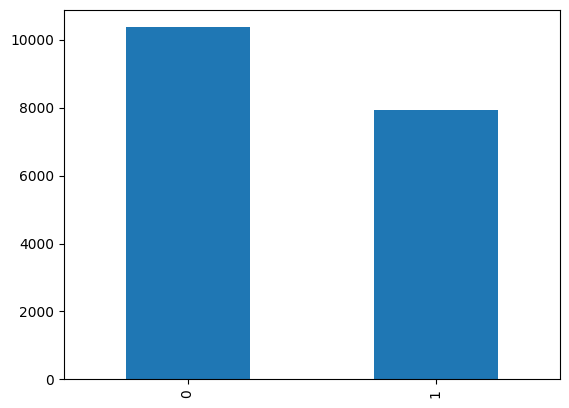

In [5]:
data = pd.read_csv('datasets/fake_news/data.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.head())

rating_counts = data['label'].value_counts()
rating_counts.plot(kind='bar')

In [22]:
X, y = data['title'] + ' ' + data['text'], data['label']

NUM_FOLDS = 5
MAX_FEATURES = 10000
N_GRAMS = 2

vectorizer = TfidfVectorizer(max_features=MAX_FEATURES, ngram_range=(1, N_GRAMS), lowercase=False)
label_encoder = LabelEncoder()
X = vectorizer.fit_transform(X)
y = label_encoder.fit_transform(y)

fold = 1

for train_index, val_index in KFold(NUM_FOLDS).split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = XGBClassifier(n_jobs=-1, random_state=42, max_depth=3, n_estimators=500, learning_rate=0.3, colsample_bytree=0.5)
    #model = DecisionTreeClassifier(max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print_classification_report(y_val, y_pred, fold)
    fold += 1


Fold: 1
Accuracy Score: 0.987968280010938
Confusion Matrix: 
 [[2024   24]
 [  20 1589]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2048
           1       0.99      0.99      0.99      1609

    accuracy                           0.99      3657
   macro avg       0.99      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657

Fold: 2
Accuracy Score: 0.9855072463768116
Confusion Matrix: 
 [[2095   32]
 [  21 1509]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2127
           1       0.98      0.99      0.98      1530

    accuracy                           0.99      3657
   macro avg       0.98      0.99      0.99      3657
weighted avg       0.99      0.99      0.99      3657

Fold: 3
Accuracy Score: 0.987968280010938
Confusion Matrix: 
 [[2006   26]
 [  18 1607]]
Classification Report: 
    

In [28]:
X, y = data['title'] + ' ' + data['text'], data['label']

MAX_FEATURES = 20000
N_GRAMS = 3

vectorizer = TfidfVectorizer(max_features=MAX_FEATURES, ngram_range=(1, N_GRAMS), lowercase=False)
label_encoder = LabelEncoder()
X = vectorizer.fit_transform(X)
y = label_encoder.fit_transform(y)


model = XGBClassifier(n_jobs=-1, random_state=42, max_depth=3, n_estimators=500, learning_rate=0.3, colsample_bytree=0.5)
model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [29]:
# test
test_data = pd.read_csv('datasets/fake_news/test.csv')
print(test_data.head())

test_data['title'].fillna('', inplace=True)
test_data['text'].fillna('', inplace=True)
X_test = vectorizer.transform(test_data['title'] + ' ' + test_data['text'])
y_pred = model.predict(X_test)

print(y_pred[:10])

      id                                              title  \
0  20800  Specter of Trump Loosens Tongues, if Not Purse...   
1  20801  Russian warships ready to strike terrorists ne...   
2  20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3  20803  Tim Tebow Will Attempt Another Comeback, This ...   
4  20804                    Keiser Report: Meme Wars (E995)   

                    author                                               text  
0         David Streitfeld  PALO ALTO, Calif.  —   After years of scorning...  
1                      NaN  Russian warships ready to strike terrorists ne...  
2            Common Dreams  Videos #NoDAPL: Native American Leaders Vow to...  
3            Daniel Victor  If at first you don’t succeed, try a different...  
4  Truth Broadcast Network  42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
[0 1 1 0 1 1 0 1 1 1]


In [30]:
output_df = pd.concat([test_data['id'], pd.Series(label_encoder.inverse_transform(y_pred))], axis=1)
print(output_df.head(10))
output_file = 'datasets/fake_news/submission.csv'
output_df.to_csv(output_file, index=False, header=['id', 'label'])

      id  0
0  20800  0
1  20801  1
2  20802  1
3  20803  0
4  20804  1
5  20805  1
6  20806  0
7  20807  1
8  20808  1
9  20809  1


: 